In [1]:
import pandas as pd

health_df = pd.read_csv("../data/ihme_data.csv")

sensor_df = pd.read_csv("../data/openaq_data.csv")
sensor_df

,pm25,co,no2,pm1,pm10,o3,so2,country
0,-74.000,NaN,NaN,NaN,NaN,NaN,NaN,DZ
1,6.200,209.000,26.000,NaN,14.700,54.000,1.180,AD
2,6.220,0.391,0.017,4.470,18.650,NaN,NaN,AR
3,2.390,0.171,0.009,4.817,12.513,0.648,0.001,AU
4,9.577,349.000,15.325,15.998,14.879,51.410,1.633,AT
...,...,...,...,...,...,...,...,...
92,42.100,NaN,NaN,NaN,NaN,NaN,NaN,UG
93,21.200,NaN,NaN,17.800,32.000,NaN,NaN,UA
94,6.613,197.143,18.680,13.601,13.290,54.167,2.097,GB
95,13.900,NaN,NaN,NaN,NaN,-0.049,NaN,UZ


In [2]:
print(sensor_df.to_string())

       pm25        co      no2      pm1     pm10      o3     so2 country
0   -74.000       NaN      NaN      NaN      NaN     NaN     NaN      DZ
1     6.200   209.000   26.000      NaN   14.700  54.000   1.180      AD
2     6.220     0.391    0.017    4.470   18.650     NaN     NaN      AR
3     2.390     0.171    0.009    4.817   12.513   0.648   0.001      AU
4     9.577   349.000   15.325   15.998   14.879  51.410   1.633      AT
5    23.800       NaN      NaN      NaN      NaN     NaN     NaN      AZ
6  -823.000       NaN      NaN      NaN      NaN  -0.994     NaN      BH
7    92.800       NaN      NaN      NaN      NaN  -0.122     NaN      BD
8     7.184   252.889   12.149    9.370   17.310  47.867   1.569      BE
9    18.800       NaN      NaN      NaN      NaN     NaN     NaN      BZ
10   35.900       NaN    8.930      NaN   23.700  93.900  10.800      BA
11   13.700     0.406   29.050      NaN   34.833  37.483   6.670      BR
12   16.700   288.290   14.544   11.124   18.720  4

In [3]:
health_parameter = "tuberculosis"
aq_parameter = "pm25"

aq_params = ["pm1", "pm10", "pm25", "co", "no2", "o3", "so2"]

In [4]:
df = pd.merge(health_df, sensor_df)

df.sort_values(aq_parameter, inplace=True)
df.set_index("country", inplace=True)

df[df < 0] = None
df = df.dropna(how="all", subset=aq_params)
df[df["tuberculosis"] > 500] = None


window = 2
df["tuberculosis_rolling_avg"] = df["tuberculosis"].rolling(window=7).mean()

for p in aq_params:
    df[p + "_rolling_avg"] = df[p].rolling(window=7).mean()
df

,tuberculosis,hiv,pm25,co,no2,pm1,pm10,o3,so2,tuberculosis_rolling_avg,pm1_rolling_avg,pm10_rolling_avg,pm25_rolling_avg,co_rolling_avg,no2_rolling_avg,o3_rolling_avg,so2_rolling_avg
country,,,,,,,,,,,,,,,,,
GH,172.153,0.698,NaN,NaN,NaN,18.900,29.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID,181.659,0.034,NaN,NaN,NaN,28.050,51.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NP,135.358,0.025,NaN,NaN,NaN,34.700,62.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AU,4.528,0.068,2.39,0.171,0.009,4.817,12.513,0.648,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MU,18.231,0.154,2.57,NaN,NaN,0.801,2.165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TD,174.053,0.391,72.20,NaN,NaN,NaN,NaN,NaN,NaN,124.447143,NaN,NaN,49.359571,NaN,NaN,NaN,NaN
BD,115.480,0.010,92.80,NaN,NaN,NaN,NaN,NaN,NaN,115.075143,NaN,NaN,56.859571,NaN,NaN,NaN,NaN
DK,2.739,0.032,NaN,181.500,7.801,NaN,11.300,58.240,NaN,76.695857,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import numpy as np
import sympy as sp

x = sp.symbols("x")

f = 1.884 * x + 8.734
f_func = sp.lambdify(x, f)

g = (sp.log(x) / sp.log(1.058)) - 6.908
g_func = sp.lambdify(x, g)

f_deriv = sp.diff(f)
f_deriv_func = sp.lambdify(x, f_deriv)

g_deriv = sp.diff(g)
g_deriv_func = sp.lambdify(x, g_deriv)

g_deriv, f_deriv


(17.7366811981209/x, 1.88400000000000)

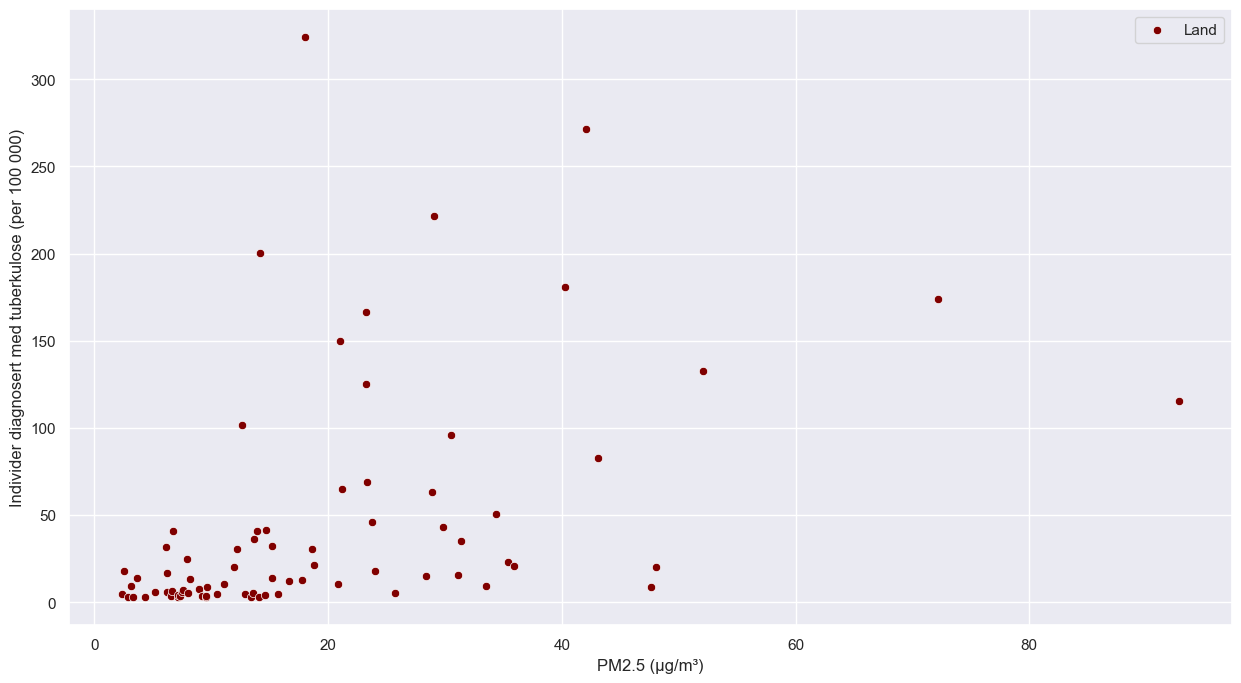

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x_range = np.linspace(df[aq_parameter].min(), df[aq_parameter].max(), 1000)

sns.set_theme()
plt.figure(figsize=(15, 8))

sns.scatterplot(
    x=df[aq_parameter], y=df[health_parameter], color="maroon", label="Land"
)
"""
sns.lineplot(
    x=df[aq_parameter + "_rolling_avg"], y=df[health_parameter + "_rolling_avg"], color="coral", label=r"PM2.5 rolling average"
)
"""
"""
sns.lineplot(
    x=x_range, y=f_func(x_range), color="red", label=r"$f(x) = \frac{17.737}{x}$"
)

sns.lineplot(
    x=x_range, y=f_deriv_func(x_range), color="tomato", label=r"$f'(x) = 1,884$"
)

sns.lineplot(
    x=x_range, y=g_func(x_range), color="blueviolet", label=r"$g(x) = \frac{ln(x)}{ln(1,058)} - 6,908$"
)
sns.lineplot(
    x=x_range, y=g_deriv_func(x_range), color="violet", label=r"$g'(x) = \frac{17.737}{x}$"
)
"""

plt.xlabel(f"PM2.5 (µg/m³)")
plt.ylabel(f"Individer diagnosert med tuberkulose (per 100 000)")
plt.show()